Objectives:
Apply Linear annealed policy with the EpsGreedyQPolicy as the inner policy:
Achieve a DQN model that trains in the least possible number of episodes.
Balance pole on the cart for 500 steps for 100 consecutive episodes while testing.

Epsilon-Greedy chooses the optimal action at each step, but sometimes randomly chooses an unlikely option.
We specify an initially high exploration rate (epsilon) of 1 at the beginning of Q function training because we know nothing about the importance of the Q table. Epsilon value is decreased as the agent has more confidence in the Q values.

A DQN agent can be used in any environment which has a discrete action space.
It is based on the Q - Network, a neural network model that can learn to predict Q-Values (expected returns) for all actions, given an observation from the environment.

The hyperparameters are:

Size of 1st fully connected layer: 256
Size of 2nd fully connected layer: 512
Period of the update of the target network parameters: 1000 steps
Discount factor: 0.99
Decay factor for epsilon in epsilon-greedy policy: 0.99
Minimum epsilon in epsilon-greeddy policy: 1E-4
Learning rate: 3E-4
Size of replay memory: 1000000
Period of experience replay: 4 steps
PER alpha: 0.2
PER beta0: 0.4


In [1]:
#Install keras rl2 which seamlessly integrates with the  OpenAI Gym  to evaluate and play around with DQN Algorithm
!pip install keras-rl2
!pip install dopamine-rl
#Install Open AI Gym for the Cart Pole Environment
!pip install gym

!pip install tensorflow --upgrade
!pip install rl-agents==0.1.1

In [9]:
import gym
import matplotlib.pyplot as plt
import keras
from keras import Sequential
from keras.layers import Input, Flatten, Dense

import rl
from rl.memory import SequentialMemory
from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

#from tensorflow.keras.optimizers import Adam



In [3]:
#Load the CartPole environment from the OpenAI Gym suite
env = gym.make("CartPole-v1")

In [4]:
initial_observation = env.reset()
print("Initial observation:", initial_observation)
cumulative_reward = 0
done = False

Initial observation: [-0.04030874  0.03286812 -0.01759062  0.04938107]


In [10]:
#Building DQN Agent with Keras-RL
# setup experience replay buffer
memory = SequentialMemory(limit=50000, window_length=1)

# setup the Linear annealed policy with the EpsGreedyQPolicy as the inner policy
policy =  LinearAnnealedPolicy(inner_policy=  EpsGreedyQPolicy(),   # policy used to select actions
                               attr='eps',                          # attribute in the inner policy to vary             
                               value_max=1.0,                       # maximum value of attribute that is varying
                               value_min=0.1,                       # minimum value of attribute that is varying
                               value_test=0.05,                     # test if the value selected is < 0.05
                               nb_steps=10000)                      # the number of steps between value_max and value_min

#Feed-Forward Neural Network Model for Deep Q Learning (DQN)
model = Sequential()
#print(env.observation_space)
#Input is 1 observation vector, and the number of observations in that vector 
model.add(Input(shape=(1,env.observation_space.shape[0])))
model.add(Flatten())
#Hidden layers with 24 nodes each
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
#Output is the number of actions in the action space
model.add(Dense(env.action_space.n, activation='linear')) 


#Feed-Forward Neural Network Architecture Summary
print(model.summary())

#Defining DQN Agent for DQN Model
dqn = DQNAgent(model=model,                     # Q-Network model
               nb_actions=env.action_space.n,   # number of actions
               memory=memory,                   # experience replay memory
               nb_steps_warmup=25,              # how many steps are waited before starting experience replay
               target_model_update=1e-2,        # how often the target network is updated
               policy=policy)                   # the action selection policy

# Configure and compile agent. 
#Use built-in tensorflow.keras Adam optimizer and evaluation metrics            
#Adam._name = 'Adam'
dqn.compile(keras.optimizers.Adam(learning_rate=1e-3), metrics=['mae','accuracy'],)



     

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_6 (Dense)             (None, 24)                120       
                                                                 
 dense_7 (Dense)             (None, 24)                600       
                                                                 
 dense_8 (Dense)             (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
#Finally fit and train the agent
history = dqn.fit(env, nb_steps=200000, visualize=False, verbose=10)

Training for 200000 steps ...
     16/200000: episode: 1, duration: 0.017s, episode steps:  16, steps per second: 949, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.438 [0.000, 1.000],  loss: --, mae: --, accuracy: --, mean_q: --, mean_eps: --
     62/200000: episode: 2, duration: 0.470s, episode steps:  46, steps per second:  98, episode reward: 46.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.543 [0.000, 1.000],  loss: 2.395662, mae: 51.798760, accuracy: 0.631944, mean_q: 104.641489, mean_eps: 0.996085
     88/200000: episode: 3, duration: 0.215s, episode steps:  26, steps per second: 121, episode reward: 26.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 1.631324, mae: 49.914343, accuracy: 0.618990, mean_q: 100.972419, mean_eps: 0.993295
    100/200000: episode: 4, duration: 0.115s, episode steps:  12, steps per second: 105, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667

    744/200000: episode: 32, duration: 0.706s, episode steps:  32, steps per second:  45, episode reward: 32.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 1.888775, mae: 51.886074, accuracy: 0.633789, mean_q: 104.934064, mean_eps: 0.934525
    756/200000: episode: 33, duration: 0.684s, episode steps:  12, steps per second:  18, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.583 [0.000, 1.000],  loss: 1.519002, mae: 50.491963, accuracy: 0.625000, mean_q: 101.801851, mean_eps: 0.932545
    779/200000: episode: 34, duration: 1.478s, episode steps:  23, steps per second:  16, episode reward: 23.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.565 [0.000, 1.000],  loss: 2.575297, mae: 51.241084, accuracy: 0.623641, mean_q: 103.673914, mean_eps: 0.930970
    795/200000: episode: 35, duration: 1.110s, episode steps:  16, steps per second:  14, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action

   1572/200000: episode: 62, duration: 0.359s, episode steps:  15, steps per second:  42, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.467 [0.000, 1.000],  loss: 2.613479, mae: 51.913678, accuracy: 0.572917, mean_q: 104.770793, mean_eps: 0.859240
   1593/200000: episode: 63, duration: 0.500s, episode steps:  21, steps per second:  42, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.286 [0.000, 1.000],  loss: 2.200799, mae: 51.927442, accuracy: 0.581845, mean_q: 104.689412, mean_eps: 0.857620
   1639/200000: episode: 64, duration: 0.864s, episode steps:  46, steps per second:  53, episode reward: 46.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.565 [0.000, 1.000],  loss: 1.799426, mae: 51.850697, accuracy: 0.618207, mean_q: 105.182564, mean_eps: 0.854605
   1665/200000: episode: 65, duration: 0.595s, episode steps:  26, steps per second:  44, episode reward: 26.000, mean reward:  1.000 [ 1.000,  1.000], mean action

   2335/200000: episode: 92, duration: 0.430s, episode steps:  26, steps per second:  61, episode reward: 26.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 2.730923, mae: 53.349017, accuracy: 0.644231, mean_q: 107.856424, mean_eps: 0.791065
   2354/200000: episode: 93, duration: 0.324s, episode steps:  19, steps per second:  59, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.579 [0.000, 1.000],  loss: 9.489605, mae: 52.027722, accuracy: 0.601974, mean_q: 104.817704, mean_eps: 0.789040
   2383/200000: episode: 94, duration: 0.506s, episode steps:  29, steps per second:  57, episode reward: 29.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.517 [0.000, 1.000],  loss: 4.113983, mae: 51.136644, accuracy: 0.642241, mean_q: 103.663080, mean_eps: 0.786880
   2420/200000: episode: 95, duration: 0.631s, episode steps:  37, steps per second:  59, episode reward: 37.000, mean reward:  1.000 [ 1.000,  1.000], mean action

   3555/200000: episode: 122, duration: 0.269s, episode steps:  24, steps per second:  89, episode reward: 24.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 3.608076, mae: 53.237559, accuracy: 0.615885, mean_q: 107.520336, mean_eps: 0.681175
   3609/200000: episode: 123, duration: 0.594s, episode steps:  54, steps per second:  91, episode reward: 54.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.407 [0.000, 1.000],  loss: 3.052263, mae: 52.544785, accuracy: 0.619792, mean_q: 106.495410, mean_eps: 0.677665
   3628/200000: episode: 124, duration: 0.208s, episode steps:  19, steps per second:  91, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.526 [0.000, 1.000],  loss: 10.522661, mae: 51.651828, accuracy: 0.595395, mean_q: 104.321842, mean_eps: 0.674380
   3686/200000: episode: 125, duration: 0.823s, episode steps:  58, steps per second:  70, episode reward: 58.000, mean reward:  1.000 [ 1.000,  1.000], mean a

   5419/200000: episode: 152, duration: 3.215s, episode steps: 158, steps per second:  49, episode reward: 158.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.468 [0.000, 1.000],  loss: 3.414192, mae: 55.135211, accuracy: 0.623616, mean_q: 111.854398, mean_eps: 0.519445
   5504/200000: episode: 153, duration: 1.517s, episode steps:  85, steps per second:  56, episode reward: 85.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.494 [0.000, 1.000],  loss: 2.978622, mae: 55.346656, accuracy: 0.626838, mean_q: 112.306188, mean_eps: 0.508510
   5542/200000: episode: 154, duration: 0.639s, episode steps:  38, steps per second:  59, episode reward: 38.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.526 [0.000, 1.000],  loss: 3.118207, mae: 55.110766, accuracy: 0.624178, mean_q: 111.779121, mean_eps: 0.502975
   5620/200000: episode: 155, duration: 1.262s, episode steps:  78, steps per second:  62, episode reward: 78.000, mean reward:  1.000 [ 1.000,  1.000], mean a

  14625/200000: episode: 182, duration: 7.211s, episode steps: 500, steps per second:  69, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 8.343705, mae: 64.392944, accuracy: 0.620687, mean_q: 129.907604, mean_eps: 0.100000
  15125/200000: episode: 183, duration: 7.230s, episode steps: 500, steps per second:  69, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 7.464338, mae: 64.856054, accuracy: 0.624750, mean_q: 130.843159, mean_eps: 0.100000
  15625/200000: episode: 184, duration: 7.141s, episode steps: 500, steps per second:  70, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.502 [0.000, 1.000],  loss: 6.461444, mae: 65.422608, accuracy: 0.618563, mean_q: 132.099318, mean_eps: 0.100000
  16125/200000: episode: 185, duration: 7.062s, episode steps: 500, steps per second:  71, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mea

  27151/200000: episode: 212, duration: 6.543s, episode steps: 447, steps per second:  68, episode reward: 447.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.510 [0.000, 1.000],  loss: 11.853732, mae: 70.584314, accuracy: 0.602838, mean_q: 142.389344, mean_eps: 0.100000
  27634/200000: episode: 213, duration: 6.864s, episode steps: 483, steps per second:  70, episode reward: 483.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.509 [0.000, 1.000],  loss: 12.193118, mae: 70.624934, accuracy: 0.601449, mean_q: 142.488284, mean_eps: 0.100000
  28088/200000: episode: 214, duration: 6.511s, episode steps: 454, steps per second:  70, episode reward: 454.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.511 [0.000, 1.000],  loss: 14.256502, mae: 70.352962, accuracy: 0.608687, mean_q: 142.200477, mean_eps: 0.100000
  28432/200000: episode: 215, duration: 4.945s, episode steps: 344, steps per second:  70, episode reward: 344.000, mean reward:  1.000 [ 1.000,  1.000], 

  41773/200000: episode: 242, duration: 3.896s, episode steps: 422, steps per second: 108, episode reward: 422.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.493 [0.000, 1.000],  loss: 10.500091, mae: 69.159694, accuracy: 0.615151, mean_q: 139.312981, mean_eps: 0.100000
  42273/200000: episode: 243, duration: 4.619s, episode steps: 500, steps per second: 108, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 13.926119, mae: 69.281341, accuracy: 0.610125, mean_q: 139.408509, mean_eps: 0.100000
  42773/200000: episode: 244, duration: 4.588s, episode steps: 500, steps per second: 109, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 16.687338, mae: 69.982005, accuracy: 0.589625, mean_q: 140.721998, mean_eps: 0.100000
  43273/200000: episode: 245, duration: 4.646s, episode steps: 500, steps per second: 108, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], 

  53139/200000: episode: 272, duration: 4.999s, episode steps: 500, steps per second: 100, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 11.002406, mae: 71.301855, accuracy: 0.574375, mean_q: 143.189532, mean_eps: 0.100000
  53639/200000: episode: 273, duration: 5.121s, episode steps: 500, steps per second:  98, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 17.734294, mae: 71.930002, accuracy: 0.584250, mean_q: 144.390256, mean_eps: 0.100000
  54139/200000: episode: 274, duration: 4.987s, episode steps: 500, steps per second: 100, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.498 [0.000, 1.000],  loss: 22.876321, mae: 72.511741, accuracy: 0.577625, mean_q: 145.371162, mean_eps: 0.100000
  54639/200000: episode: 275, duration: 5.034s, episode steps: 500, steps per second:  99, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], 

  65892/200000: episode: 302, duration: 0.470s, episode steps:  50, steps per second: 106, episode reward: 50.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.540 [0.000, 1.000],  loss: 8.271357, mae: 88.526307, accuracy: 0.546250, mean_q: 177.432256, mean_eps: 0.100000
  66036/200000: episode: 303, duration: 1.339s, episode steps: 144, steps per second: 108, episode reward: 144.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.486 [0.000, 1.000],  loss: 27.063257, mae: 87.947179, accuracy: 0.556858, mean_q: 176.028235, mean_eps: 0.100000
  66220/200000: episode: 304, duration: 1.652s, episode steps: 184, steps per second: 111, episode reward: 184.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 16.708213, mae: 88.060188, accuracy: 0.552819, mean_q: 176.207219, mean_eps: 0.100000
  66720/200000: episode: 305, duration: 4.754s, episode steps: 500, steps per second: 105, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], me

  73991/200000: episode: 332, duration: 1.808s, episode steps: 166, steps per second:  92, episode reward: 166.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.524 [0.000, 1.000],  loss: 16.363174, mae: 81.711883, accuracy: 0.533509, mean_q: 163.290813, mean_eps: 0.100000
  74180/200000: episode: 333, duration: 1.957s, episode steps: 189, steps per second:  97, episode reward: 189.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.524 [0.000, 1.000],  loss: 28.368004, mae: 80.830399, accuracy: 0.549107, mean_q: 161.392898, mean_eps: 0.100000
  74314/200000: episode: 334, duration: 2.167s, episode steps: 134, steps per second:  62, episode reward: 134.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.530 [0.000, 1.000],  loss: 15.275210, mae: 80.562123, accuracy: 0.529851, mean_q: 161.191887, mean_eps: 0.100000
  74462/200000: episode: 335, duration: 2.415s, episode steps: 148, steps per second:  61, episode reward: 148.000, mean reward:  1.000 [ 1.000,  1.000], 

  80061/200000: episode: 362, duration: 1.621s, episode steps: 176, steps per second: 109, episode reward: 176.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.460 [0.000, 1.000],  loss: 22.046651, mae: 74.900181, accuracy: 0.568004, mean_q: 149.974264, mean_eps: 0.100000
  80224/200000: episode: 363, duration: 1.504s, episode steps: 163, steps per second: 108, episode reward: 163.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.454 [0.000, 1.000],  loss: 24.235057, mae: 74.744490, accuracy: 0.554064, mean_q: 149.784460, mean_eps: 0.100000
  80381/200000: episode: 364, duration: 1.667s, episode steps: 157, steps per second:  94, episode reward: 157.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.471 [0.000, 1.000],  loss: 16.394906, mae: 75.129312, accuracy: 0.565486, mean_q: 150.535656, mean_eps: 0.100000
  80633/200000: episode: 365, duration: 3.187s, episode steps: 252, steps per second:  79, episode reward: 252.000, mean reward:  1.000 [ 1.000,  1.000], 

  89116/200000: episode: 392, duration: 4.823s, episode steps: 500, steps per second: 104, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.494 [0.000, 1.000],  loss: 24.701658, mae: 87.980774, accuracy: 0.569688, mean_q: 177.790113, mean_eps: 0.100000
  89616/200000: episode: 393, duration: 12.401s, episode steps: 500, steps per second:  40, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.502 [0.000, 1.000],  loss: 31.888866, mae: 90.694043, accuracy: 0.573937, mean_q: 183.648076, mean_eps: 0.100000
  90116/200000: episode: 394, duration: 8.131s, episode steps: 500, steps per second:  61, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 37.794214, mae: 94.980486, accuracy: 0.576000, mean_q: 192.522643, mean_eps: 0.100000
  90508/200000: episode: 395, duration: 7.561s, episode steps: 392, steps per second:  52, episode reward: 392.000, mean reward:  1.000 [ 1.000,  1.000],

 102780/200000: episode: 421, duration: 6.400s, episode steps: 500, steps per second:  78, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 47.970083, mae: 129.980529, accuracy: 0.593125, mean_q: 261.261382, mean_eps: 0.100000
 103280/200000: episode: 422, duration: 5.551s, episode steps: 500, steps per second:  90, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 42.411649, mae: 128.049173, accuracy: 0.585812, mean_q: 257.319907, mean_eps: 0.100000
 103780/200000: episode: 423, duration: 7.603s, episode steps: 500, steps per second:  66, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.502 [0.000, 1.000],  loss: 52.487767, mae: 126.790684, accuracy: 0.578375, mean_q: 254.793829, mean_eps: 0.100000
 104280/200000: episode: 424, duration: 8.354s, episode steps: 500, steps per second:  60, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000

 112714/200000: episode: 450, duration: 4.154s, episode steps: 301, steps per second:  72, episode reward: 301.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.502 [0.000, 1.000],  loss: 28.838449, mae: 93.160783, accuracy: 0.558451, mean_q: 187.027116, mean_eps: 0.100000
 113006/200000: episode: 451, duration: 5.409s, episode steps: 292, steps per second:  54, episode reward: 292.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.503 [0.000, 1.000],  loss: 20.330241, mae: 92.823794, accuracy: 0.554259, mean_q: 186.603256, mean_eps: 0.100000
 113506/200000: episode: 452, duration: 7.593s, episode steps: 500, steps per second:  66, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 22.522492, mae: 91.536619, accuracy: 0.565562, mean_q: 183.741832, mean_eps: 0.100000
 114006/200000: episode: 453, duration: 7.650s, episode steps: 500, steps per second:  65, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], 

 127506/200000: episode: 480, duration: 7.062s, episode steps: 500, steps per second:  71, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 39.355722, mae: 96.074903, accuracy: 0.579438, mean_q: 193.301974, mean_eps: 0.100000
 128006/200000: episode: 481, duration: 6.817s, episode steps: 500, steps per second:  73, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 32.231067, mae: 97.190747, accuracy: 0.561187, mean_q: 195.736133, mean_eps: 0.100000
 128506/200000: episode: 482, duration: 6.710s, episode steps: 500, steps per second:  75, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 41.743624, mae: 98.281878, accuracy: 0.577562, mean_q: 197.642248, mean_eps: 0.100000
 129006/200000: episode: 483, duration: 6.548s, episode steps: 500, steps per second:  76, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], 

 138638/200000: episode: 509, duration: 5.105s, episode steps: 500, steps per second:  98, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 37.586369, mae: 101.855505, accuracy: 0.549438, mean_q: 203.828537, mean_eps: 0.100000
 139138/200000: episode: 510, duration: 6.108s, episode steps: 500, steps per second:  82, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.498 [0.000, 1.000],  loss: 40.067079, mae: 100.554308, accuracy: 0.543562, mean_q: 201.038423, mean_eps: 0.100000
 139638/200000: episode: 511, duration: 6.179s, episode steps: 500, steps per second:  81, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 41.912438, mae: 99.078054, accuracy: 0.558125, mean_q: 197.883826, mean_eps: 0.100000
 140138/200000: episode: 512, duration: 6.222s, episode steps: 500, steps per second:  80, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000]

 149095/200000: episode: 539, duration: 6.192s, episode steps: 500, steps per second:  81, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.498 [0.000, 1.000],  loss: 21.131820, mae: 73.167462, accuracy: 0.536687, mean_q: 146.426262, mean_eps: 0.100000
 149595/200000: episode: 540, duration: 5.732s, episode steps: 500, steps per second:  87, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 21.874641, mae: 73.178231, accuracy: 0.536062, mean_q: 146.555421, mean_eps: 0.100000
 150095/200000: episode: 541, duration: 4.929s, episode steps: 500, steps per second: 101, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.506 [0.000, 1.000],  loss: 24.150570, mae: 73.946973, accuracy: 0.539687, mean_q: 148.143148, mean_eps: 0.100000
 150595/200000: episode: 542, duration: 5.900s, episode steps: 500, steps per second:  85, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], 

 161454/200000: episode: 569, duration: 0.445s, episode steps:  21, steps per second:  47, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.476 [0.000, 1.000],  loss: 15.304311, mae: 67.960344, accuracy: 0.498512, mean_q: 136.024450, mean_eps: 0.100000
 161954/200000: episode: 570, duration: 5.311s, episode steps: 500, steps per second:  94, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.502 [0.000, 1.000],  loss: 22.943003, mae: 67.680246, accuracy: 0.524438, mean_q: 135.141379, mean_eps: 0.100000
 162454/200000: episode: 571, duration: 6.784s, episode steps: 500, steps per second:  74, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.498 [0.000, 1.000],  loss: 24.993659, mae: 67.152126, accuracy: 0.505563, mean_q: 134.016500, mean_eps: 0.100000
 162568/200000: episode: 572, duration: 1.524s, episode steps: 114, steps per second:  75, episode reward: 114.000, mean reward:  1.000 [ 1.000,  1.000], m

 166482/200000: episode: 599, duration: 0.377s, episode steps:  44, steps per second: 117, episode reward: 44.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.477 [0.000, 1.000],  loss: 28.685504, mae: 69.186920, accuracy: 0.542614, mean_q: 138.977751, mean_eps: 0.100000
 166640/200000: episode: 600, duration: 1.307s, episode steps: 158, steps per second: 121, episode reward: 158.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.481 [0.000, 1.000],  loss: 27.909546, mae: 69.038702, accuracy: 0.530063, mean_q: 138.415742, mean_eps: 0.100000
 166678/200000: episode: 601, duration: 0.356s, episode steps:  38, steps per second: 107, episode reward: 38.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 29.250937, mae: 68.973495, accuracy: 0.500822, mean_q: 138.043119, mean_eps: 0.100000
 167178/200000: episode: 602, duration: 6.240s, episode steps: 500, steps per second:  80, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], me

 175373/200000: episode: 629, duration: 3.812s, episode steps: 209, steps per second:  55, episode reward: 209.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.512 [0.000, 1.000],  loss: 16.494546, mae: 68.824720, accuracy: 0.554575, mean_q: 138.832005, mean_eps: 0.100000
 175873/200000: episode: 630, duration: 5.247s, episode steps: 500, steps per second:  95, episode reward: 500.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.498 [0.000, 1.000],  loss: 28.089113, mae: 68.639073, accuracy: 0.545625, mean_q: 138.077694, mean_eps: 0.100000
 176020/200000: episode: 631, duration: 2.212s, episode steps: 147, steps per second:  66, episode reward: 147.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.503 [0.000, 1.000],  loss: 18.634626, mae: 68.587182, accuracy: 0.558886, mean_q: 138.197976, mean_eps: 0.100000
 176315/200000: episode: 632, duration: 2.814s, episode steps: 295, steps per second: 105, episode reward: 295.000, mean reward:  1.000 [ 1.000,  1.000], 

 183428/200000: episode: 659, duration: 1.384s, episode steps: 176, steps per second: 127, episode reward: 176.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.511 [0.000, 1.000],  loss: 19.360420, mae: 74.268476, accuracy: 0.559659, mean_q: 150.353550, mean_eps: 0.100000
 183616/200000: episode: 660, duration: 3.766s, episode steps: 188, steps per second:  50, episode reward: 188.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 32.411067, mae: 74.019199, accuracy: 0.574634, mean_q: 149.835869, mean_eps: 0.100000
 183627/200000: episode: 661, duration: 0.101s, episode steps:  11, steps per second: 109, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.818 [0.000, 1.000],  loss: 30.090878, mae: 73.580710, accuracy: 0.616477, mean_q: 150.069962, mean_eps: 0.100000
 183726/200000: episode: 662, duration: 0.890s, episode steps:  99, steps per second: 111, episode reward: 99.000, mean reward:  1.000 [ 1.000,  1.000], me

 189205/200000: episode: 689, duration: 3.219s, episode steps: 214, steps per second:  66, episode reward: 214.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.472 [0.000, 1.000],  loss: 26.756964, mae: 71.341262, accuracy: 0.599007, mean_q: 145.219992, mean_eps: 0.100000
 189674/200000: episode: 690, duration: 4.612s, episode steps: 469, steps per second: 102, episode reward: 469.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.493 [0.000, 1.000],  loss: 26.936062, mae: 70.929622, accuracy: 0.592751, mean_q: 144.578334, mean_eps: 0.100000
 190150/200000: episode: 691, duration: 6.092s, episode steps: 476, steps per second:  78, episode reward: 476.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.487 [0.000, 1.000],  loss: 23.817042, mae: 70.854763, accuracy: 0.589286, mean_q: 144.325738, mean_eps: 0.100000
 190283/200000: episode: 692, duration: 1.120s, episode steps: 133, steps per second: 119, episode reward: 133.000, mean reward:  1.000 [ 1.000,  1.000], 

 196808/200000: episode: 719, duration: 2.433s, episode steps: 303, steps per second: 125, episode reward: 303.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.505 [0.000, 1.000],  loss: 21.300025, mae: 70.133500, accuracy: 0.609633, mean_q: 144.412312, mean_eps: 0.100000
 197166/200000: episode: 720, duration: 4.931s, episode steps: 358, steps per second:  73, episode reward: 358.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.506 [0.000, 1.000],  loss: 23.517489, mae: 70.528138, accuracy: 0.603090, mean_q: 145.290723, mean_eps: 0.100000
 197501/200000: episode: 721, duration: 2.911s, episode steps: 335, steps per second: 115, episode reward: 335.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.504 [0.000, 1.000],  loss: 28.047645, mae: 71.196345, accuracy: 0.613713, mean_q: 146.586041, mean_eps: 0.100000
 197707/200000: episode: 722, duration: 3.770s, episode steps: 206, steps per second:  55, episode reward: 206.000, mean reward:  1.000 [ 1.000,  1.000], 

In [ ]:
"""
action = 0
observation, reward, done, info = env.step(action)
print("Observations after action: ", observation)
print("Reward for this step: ", reward)
print("Episode Completion: ", done)


"""


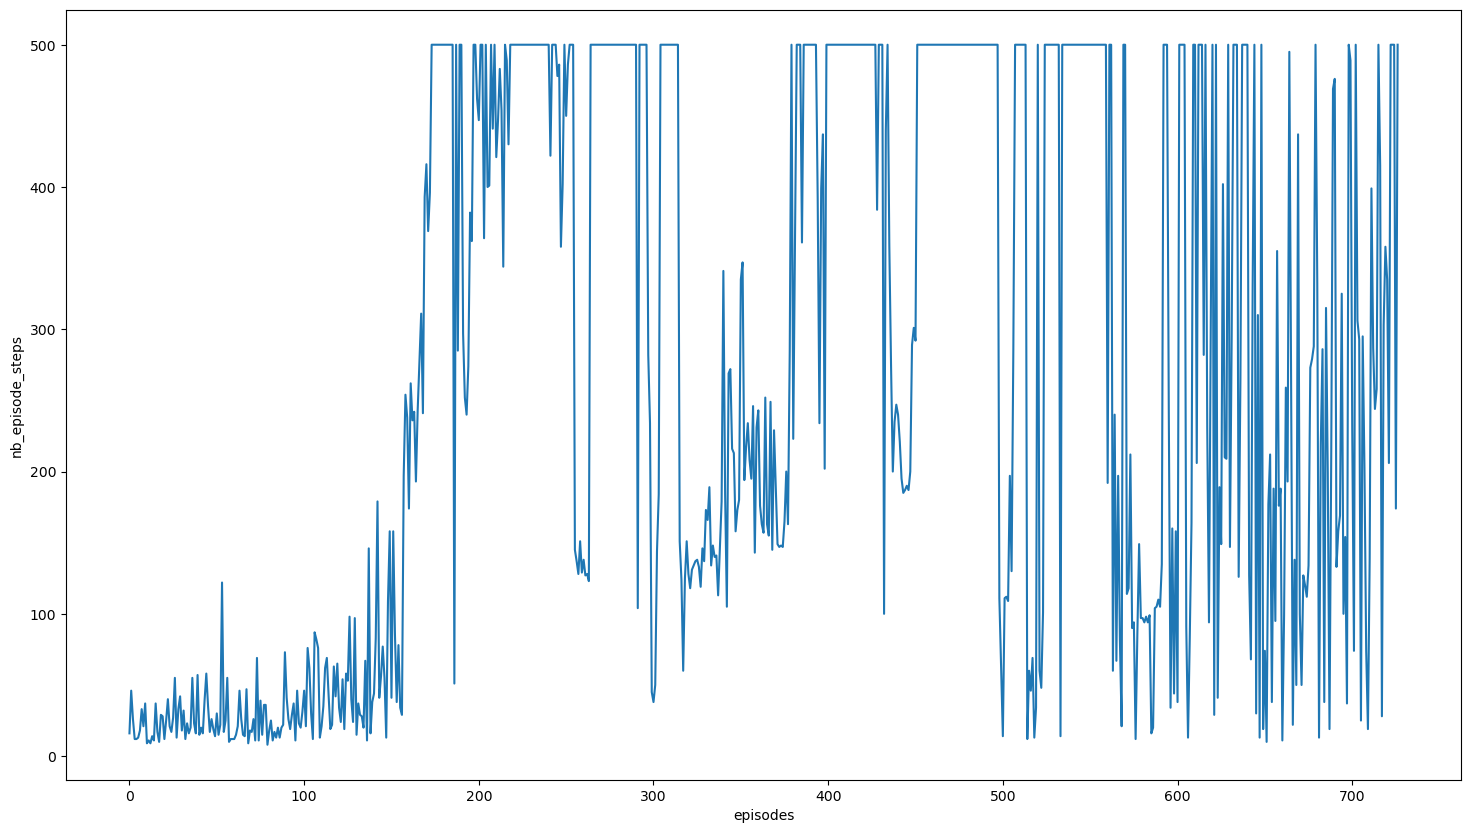

Testing for 20 episodes ...
Episode 1: reward: 500.000, steps: 500
Episode 2: reward: 500.000, steps: 500
Episode 3: reward: 500.000, steps: 500
Episode 4: reward: 500.000, steps: 500
Episode 5: reward: 500.000, steps: 500
Episode 6: reward: 500.000, steps: 500
Episode 7: reward: 500.000, steps: 500
Episode 8: reward: 500.000, steps: 500
Episode 9: reward: 500.000, steps: 500
Episode 10: reward: 500.000, steps: 500
Episode 11: reward: 500.000, steps: 500
Episode 12: reward: 500.000, steps: 500
Episode 13: reward: 500.000, steps: 500
Episode 14: reward: 500.000, steps: 500
Episode 15: reward: 500.000, steps: 500
Episode 16: reward: 500.000, steps: 500
Episode 17: reward: 500.000, steps: 500
Episode 18: reward: 500.000, steps: 500
Episode 19: reward: 500.000, steps: 500
Episode 20: reward: 500.000, steps: 500


In [15]:
# Visualize the history for number of Training episode steps of the Cart Pole Game
plt.figure(figsize = (18,10))
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

# Finally, evaluate and test our algorithm for 100 episodes.
dqn.test(env, nb_episodes=20, visualize=False)



In [16]:
# After training is done, we save the final weights.
dqn.save_weights('dqn_weights.h5f', overwrite=True)

In [32]:
observation = env.reset()
dqn.load_weights('dqn_weights.h5f')
action = dqn.forward(observation)

print("Observation: ", observation)
print("Chosen action: ", action)

new_observation, reward, done, info = env.step(action)
print("Observations after action: ", new_observation)
print("Reward for this step: ", reward)
print("Episode Completion: ", done)

Observation:  [-0.03752364  0.04612687  0.01535043 -0.0004518 ]
Chosen action:  0
Observations after action:  [-0.0366011  -0.14921183  0.01534139  0.29703457]
Reward for this step:  1.0
Episode Completion:  False
